In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path 
import os

In [2]:
data_path=Path("../data/MetroPT3(AirCompressor).csv")

data=pd.read_csv(data_path)

In [3]:
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


This MetroPT-3 Dataset contains readings from pressure, temperature, motor current, and air intake valves were collected from a compressor's Air Production Unit (APU) from a metro train. This dataset reveals real predictive maintenance challenges encountered in the industry .It consists of multivariate time series data obtained from several analogue and digital sensors installed on the compressor of a train.

In [4]:
data.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

## Dataset Description

The dataset consists of **15,169,480** data points collected at **1Hz** from **February to August 2020** and is described by **15 features** from **7 analogue sensors (1-7)** and **8 digital sensors (8-15)**:

### Analogue Sensors
1. **TP2 (bar)** – Measures the pressure on the compressor.
2. **TP3 (bar)** – Measures the pressure generated at the pneumatic panel.
3. **H1 (bar)** – Measures the pressure generated due to a pressure drop when the discharge of the cyclonic separator filter occurs.
4. **DV Pressure (bar)** – Measures the pressure drop generated when the towers discharge air dryers; a zero reading indicates that the compressor is operating under load.
5. **Reservoirs (bar)** – Measures the downstream pressure of the reservoirs, which should be close to the pneumatic panel pressure (TP3).
6. **Motor Current (A)** – Measures the current of one phase of the three-phase motor. It presents the following values:
   - Close to 0A: when the motor is off.
   - 4A: when working offloaded.
   - 7A: when working under load.
   - 9A: when it starts working.
7. **Oil Temperature (ºC)** – Measures the oil temperature on the compressor.

### Digital Sensors
8. **COMP** – The electrical signal of the air intake valve on the compressor. It is active when there is no air intake, indicating that the compressor is either turned off or operating in an offloaded state.
9. **DV Electric** – The electrical signal that controls the compressor outlet valve. It is active when the compressor is functioning under load and inactive when the compressor is either off or operating in an offloaded state.
10. **TOWERS** – The electrical signal that defines the tower responsible for drying the air and the tower responsible for draining the humidity removed from the air. When not active, tower one is functioning; when active, tower two is in operation.
11. **MPG** – The electrical signal responsible for starting the compressor under load by activating the intake valve when the pressure in the air production unit (APU) falls below 8.2 bar. It activates the COMP sensor, which assumes the same behaviour as the MPG sensor.
12. **LPS** – The electrical signal that detects and activates when the pressure drops below 7 bars.
13. **Pressure Switch** – The electrical signal that detects the discharge in the air-drying towers.
14. **Oil Level** – The electrical signal that detects the oil level in the compressor. It is active when the oil is below the expected values.
15. **Caudal Impulse** – The electrical signal that counts the pulse outputs generated by the absolute amount of air flowing from the APU to the reservoirs.


In [5]:
data=data.drop(columns=["Unnamed: 0"])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   timestamp        1516948 non-null  object 
 1   TP2              1516948 non-null  float64
 2   TP3              1516948 non-null  float64
 3   H1               1516948 non-null  float64
 4   DV_pressure      1516948 non-null  float64
 5   Reservoirs       1516948 non-null  float64
 6   Oil_temperature  1516948 non-null  float64
 7   Motor_current    1516948 non-null  float64
 8   COMP             1516948 non-null  float64
 9   DV_eletric       1516948 non-null  float64
 10  Towers           1516948 non-null  float64
 11  MPG              1516948 non-null  float64
 12  LPS              1516948 non-null  float64
 13  Pressure_switch  1516948 non-null  float64
 14  Oil_level        1516948 non-null  float64
 15  Caudal_impulses  1516948 non-null  float64
dtypes: float64(15), ob

In [7]:
data.describe()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


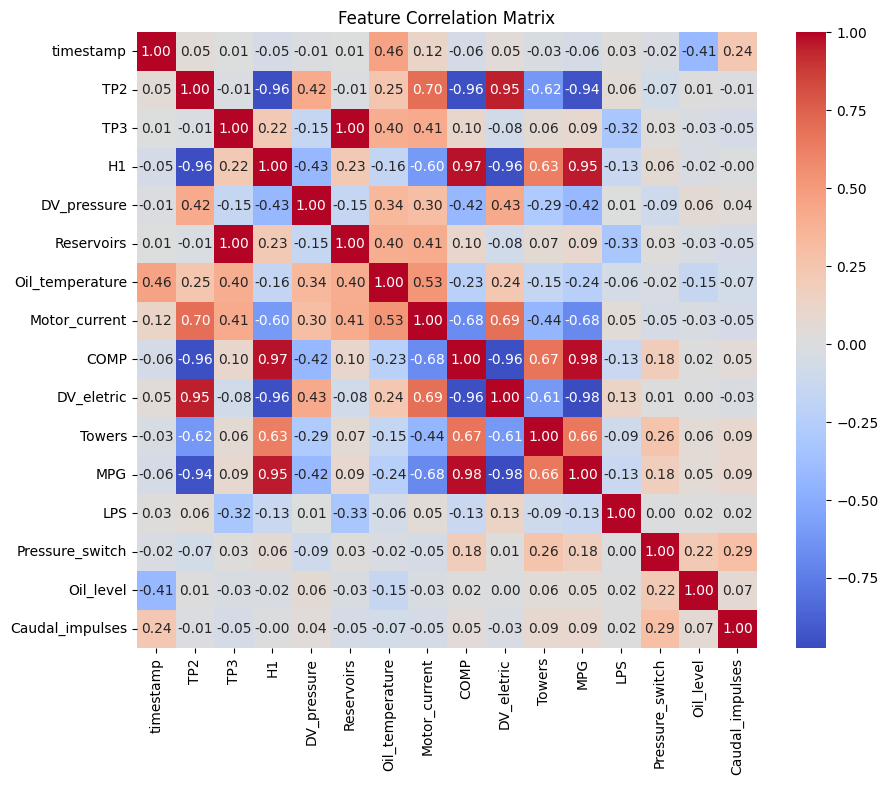

In [10]:
data["timestamp"]= pd.to_datetime(data["timestamp"])
correlation = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()


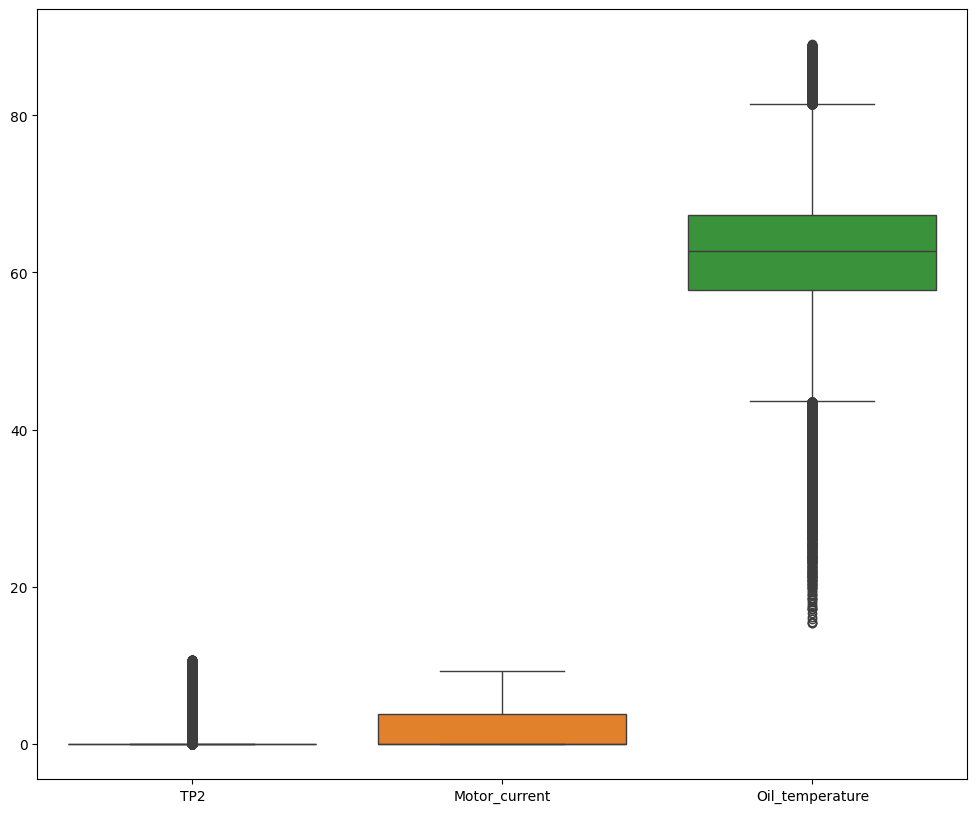

In [15]:
plt.figure(figsize=(12,10))
sns.boxplot(data=data[["TP2","Motor_current","Oil_temperature"]])
plt.show()